<a href="https://colab.research.google.com/github/dmaitethia/Python-Basics/blob/main/MaizeDiseaseClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Install Dependencies and Setup

Import Libraries

In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [4]:
import cv2
import imghdr

In [5]:
#data_dir = '/content/ImageClassification/data'
data_dir = '/content/data'

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
#data = tf.keras.utils.image_dataset_from_directory('/content/ImageClassification/data')
data = tf.keras.utils.image_dataset_from_directory('/content/data')

Found 789 files belonging to 2 classes.


In [11]:
data_iterator = data.as_numpy_iterator()

In [12]:
batch = data_iterator.next()

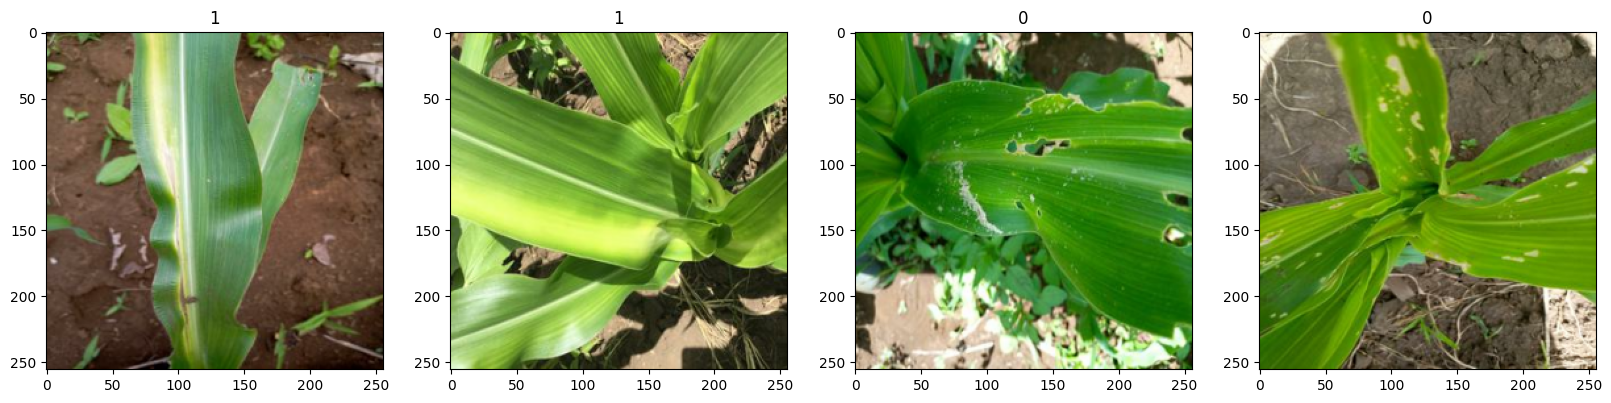

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [14]:
data = data.map(lambda x,y: (x/255, y))

In [15]:
data.as_numpy_iterator().next()

(array([[[[0.827451  , 0.8627451 , 0.88235295],
          [0.827451  , 0.8627451 , 0.88235295],
          [0.827451  , 0.8627451 , 0.88235295],
          ...,
          [0.21792279, 0.6924326 , 0.18583171],
          [0.21985796, 0.69436777, 0.18081605],
          [0.22322136, 0.7013157 , 0.17683657]],
 
         [[0.827451  , 0.8627451 , 0.88235295],
          [0.827451  , 0.8627451 , 0.88235295],
          [0.827451  , 0.8627451 , 0.88235295],
          ...,
          [0.21691176, 0.69142157, 0.1889093 ],
          [0.22150736, 0.69601715, 0.18431373],
          [0.22344252, 0.7006127 , 0.17890601]],
 
         [[0.827451  , 0.8627451 , 0.88235295],
          [0.827451  , 0.8627451 , 0.88235295],
          [0.827451  , 0.8627451 , 0.88235295],
          ...,
          [0.20967013, 0.6834559 , 0.18503778],
          [0.21354167, 0.68805146, 0.17971814],
          [0.21813725, 0.69264704, 0.17921118]],
 
         ...,
 
         [[0.36078432, 0.3254902 , 0.21176471],
          [0.36078

# 5. Split Data

In [16]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [17]:
train_size

17

In [18]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [19]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [21]:
model = Sequential()

In [22]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# 7. Train

In [25]:
logdir='logs'

In [26]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [27]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
17/17 [==============================] - 44s 3s/step - loss: 0.6538 - accuracy: 0.7022 - val_loss: 0.5182 - val_accuracy: 0.7875
Epoch 2/20
17/17 [==============================] - 33s 2s/step - loss: 0.5310 - accuracy: 0.7610 - val_loss: 0.6914 - val_accuracy: 0.7188
Epoch 3/20
17/17 [==============================] - 34s 2s/step - loss: 0.5422 - accuracy: 0.7518 - val_loss: 0.4905 - val_accuracy: 0.7625
Epoch 4/20
17/17 [==============================] - 33s 2s/step - loss: 0.5042 - accuracy: 0.7537 - val_loss: 0.4625 - val_accuracy: 0.7937
Epoch 5/20
17/17 [==============================] - 35s 2s/step - loss: 0.4502 - accuracy: 0.8088 - val_loss: 0.5351 - val_accuracy: 0.7188
Epoch 6/20
17/17 [==============================] - 35s 2s/step - loss: 0.4374 - accuracy: 0.8143 - val_loss: 0.4415 - val_accuracy: 0.8188
Epoch 7/20
17/17 [==============================] - 35s 2s/step - loss: 0.3672 - accuracy: 0.8401 - val_loss: 0.3469 - val_accuracy: 0.8625
Epoch 8/20
17/17 [==

# 8. Plot Performance

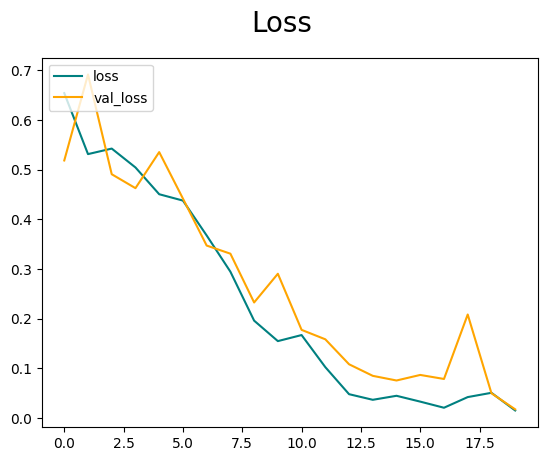

In [28]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

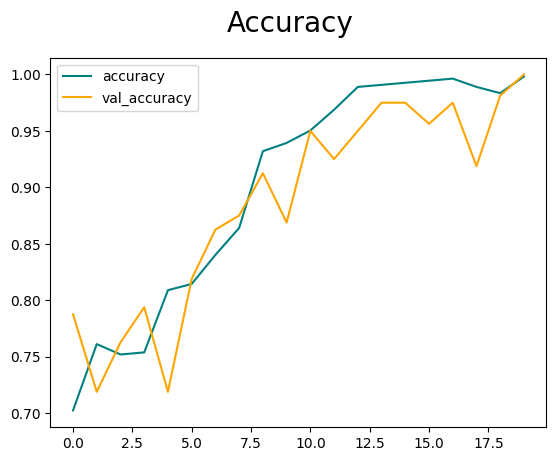

In [29]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [31]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [32]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [36]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 861ms/step


In [37]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [38]:
pre.result()

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

# 10. Test

In [ ]:
import cv2

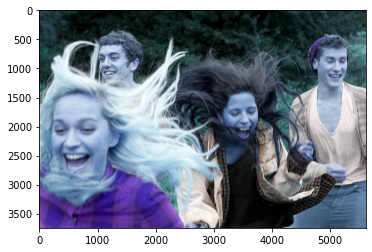

In [ ]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

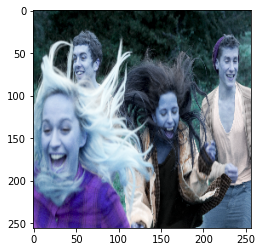

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [ ]:
yhat

array([[0.01972741]], dtype=float32)

In [ ]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','imageclassifier.h5'))

In [ ]:
new_model = load_model('imageclassifier.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

array([[0.01972741]], dtype=float32)